<a href="https://colab.research.google.com/github/SandeeeeeeeeepDey/data-science-11-weeks-progg/blob/main/Chapter_11_pushups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. What is the problem that Glorot initialization and He initialization aim
to fix?

In [ ]:
# ans post first fast read

    '''
        To tackle the vanishing and/or exploding gradients, we randomly
        initialize the weights for all layer such that it
        follows these initialization rules, where the mean is 0 and SD is 1.

        It also helps with regularization.
    '''

2. Is it OK to initialize all the weights to the same value as long as that
value is selected randomly using He initialization?

In [ ]:
# ans post first fast read

    '''
        I think yes.
    '''

3. Is it OK to initialize the bias terms to 0?

In [ ]:
# ans post first fast read

    '''
        I think yes.
    '''

4. In which cases would you want to use each of the activation functions
we discussed in this chapter?

In [ ]:
# ans post first fast read

    '''
        Fast- ReLU or Leaky ReLU
        Deep- Smooth relu
    '''

5. What may happen if you set the momentum hyperparameter too close to
1 (e.g., 0.99999) when using an SGD optimizer?

In [ ]:
# ans post first fast read

    '''
        Convergence will become very slow or may keep going back and forth
        around the global optimum
    '''

6. Name three ways you can produce a sparse model.

In [ ]:
# ans post first fast read

    '''
        Lasso,

    '''

7. Does dropout slow down training? Does it slow down inference (i.e.,
making predictions on new instances)? What about MC dropout?

In [ ]:
# ans post first fast read

    '''
        It does show down the training because each neuron have to learn more.

        It dosent slow down on inference.

        for MC dropout, it slows down quiet a lot, but only during training
    '''

## 8. Deep Learning on CIFAR10

### a.
*Exercise: Build a DNN with 20 hidden layers of 100 neurons each (that's too many, but it's the point of this exercise). Use He initialization and the Swish activation function.*

In [ ]:
tf.random.set_seed(24)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = [32,32,3]))
for i in range(20):
    model.add(tf.keras.layers.Dense(100, activation = 'swish', kernel_initializer = "he_normal"))

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100,
                                    activation="swish",
                                    kernel_initializer="he_normal"))

### b.
*Exercise: Using Nadam optimization and early stopping, train the network on the CIFAR10 dataset. You can load it with `tf.keras.datasets.cifar10.load_data()`. The dataset is composed of 60,000 32 × 32–pixel color images (50,000 for training, 10,000 for testing) with 10 classes, so you'll need a softmax output layer with 10 neurons. Remember to search for the right learning rate each time you change the model's architecture or hyperparameters.*

Let's add the output layer to the model:

In [ ]:
model.add(tf.keras.layers.Dense(10, activation="softmax"))

Let's use a Nadam optimizer with a learning rate of 5e-5. I tried learning rates 1e-5, 3e-5, 1e-4, 3e-4, 1e-3, 3e-3 and 1e-2, and I compared their learning curves for 10 epochs each (using the TensorBoard callback, below). The learning rates 3e-5 and 1e-4 were pretty good, so I tried 5e-5, which turned out to be slightly better.

In [ ]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [ ]:
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

optimizer = tf.keras.optimizers.Nadam(learning_rate = 5e-5, )

Let's load the CIFAR10 dataset. We also want to use early stopping, so we need a validation set. Let's use the first 5,000 images of the original training set as the validation set:

In [ ]:
cifar10 = tf.keras.datasets.cifar10.load_data()
(X_train_full, y_train_full), (X_test, y_test) = cifar10

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

Now we can create the callbacks we need and train the model:

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20,
                                                     restore_best_weights=True)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_cifar10_model",
                                                         save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = Path() / "my_cifar10_logs" / f"run_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=./my_cifar10_logs

In [ ]:
model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

Epoch 1/100
1407/1407 [==============================] - 17s 10ms/step - loss: 4.0462 - accuracy: 0.1597 - val_loss: 2.1441 - val_accuracy: 0.2036
Epoch 2/100
1407/1407 [==============================] - 12s 9ms/step - loss: 2.0667 - accuracy: 0.2320 - val_loss: 2.0134 - val_accuracy: 0.2472
Epoch 3/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.9472 - accuracy: 0.2819 - val_loss: 1.9427 - val_accuracy: 0.2796
Epoch 4/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.8637 - accuracy: 0.3182 - val_loss: 1.8934 - val_accuracy: 0.3222
Epoch 5/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.7974 - accuracy: 0.3465 - val_loss: 1.8389 - val_accuracy: 0.3284
Epoch 6/100
1407/1407 [==============================] - 9s 7ms/step - loss: 1.7446 - accuracy: 0.3664 - val_loss: 2.0006 - val_accuracy: 0.3030
Epoch 7/100
1407/1407 [==============================] - 12s 8ms/step - loss: 1.6974 - accuracy: 0.3852 - val_loss: 1.707

In [ ]:
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 0s 2ms/step - loss: 1.5062 - accuracy: 0.4676


[1.5061508417129517, 0.4675999879837036]

The model with the lowest validation loss gets about 46.8% accuracy on the validation set. It took 29 epochs to reach the lowest validation loss, with roughly 10 seconds per epoch on my laptop (without a GPU). Let's see if we can improve the model using Batch Normalization.

### c.
*Exercise: Now try adding Batch Normalization and compare the learning curves: Is it converging faster than before? Does it produce a better model? How does it affect training speed?*

The code below is very similar to the code above, with a few changes:

* I added a BN layer after every Dense layer (before the activation function), except for the output layer.
* I changed the learning rate to 5e-4. I experimented with 1e-5, 3e-5, 5e-5, 1e-4, 3e-4, 5e-4, 1e-3 and 3e-3, and I chose the one with the best validation performance after 20 epochs.
* I renamed the run directories to run_bn_* and the model file name to `my_cifar10_bn_model`.

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100, kernel_initializer="he_normal"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation("swish"))

model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20,
                                                     restore_best_weights=True)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_cifar10_bn_model",
                                                         save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = Path() / "my_cifar10_logs" / f"run_bn_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

model.evaluate(X_valid, y_valid)

Epoch 1/100
1407/1407 [==============================] - 32s 18ms/step - loss: 2.0374 - accuracy: 0.2525 - val_loss: 1.8766 - val_accuracy: 0.3154
Epoch 2/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.7874 - accuracy: 0.3542 - val_loss: 1.8784 - val_accuracy: 0.3268
Epoch 3/100
1407/1407 [==============================] - 20s 15ms/step - loss: 1.6806 - accuracy: 0.3969 - val_loss: 1.9764 - val_accuracy: 0.3252
Epoch 4/100
1407/1407 [==============================] - 24s 17ms/step - loss: 1.6112 - accuracy: 0.4228 - val_loss: 1.7087 - val_accuracy: 0.3750
Epoch 5/100
1407/1407 [==============================] - 21s 15ms/step - loss: 1.5521 - accuracy: 0.4476 - val_loss: 1.6272 - val_accuracy: 0.4176
Epoch 6/100
1407/1407 [==============================] - 23s 16ms/step - loss: 1.5030 - accuracy: 0.4660 - val_loss: 1.5401 - val_accuracy: 0.4452
Epoch 7/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.4559 - accuracy: 0.4812 - val_loss: 1

[1.4236289262771606, 0.5073999762535095]

* *Is the model converging faster than before?* Much faster! The previous model took 29 epochs to reach the lowest validation loss, while the new model achieved that same loss in just 12 epochs and continued to make progress until the 17th epoch. The BN layers stabilized training and allowed us to use a much larger learning rate, so convergence was faster.
* *Does BN produce a better model?* Yes! The final model is also much better, with 50.7% validation accuracy instead of 46.7%. It's still not a very good model, but at least it's much better than before (a Convolutional Neural Network would do much better, but that's a different topic, see chapter 14).
* *How does BN affect training speed?* Although the model converged much faster, each epoch took about 15s instead of 10s, because of the extra computations required by the BN layers. But overall the training time (wall time) to reach the best model was shortened by about 10%.

### d.
*Exercise: Try replacing Batch Normalization with SELU, and make the necessary adjustements to ensure the network self-normalizes (i.e., standardize the input features, use LeCun normal initialization, make sure the DNN contains only a sequence of dense layers, etc.).*

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100,
                                    kernel_initializer="lecun_normal",
                                    activation="selu"))

model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.Nadam(learning_rate=7e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=20, restore_best_weights=True)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    "my_cifar10_selu_model", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = Path() / "my_cifar10_logs" / f"run_selu_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

model.evaluate(X_valid_scaled, y_valid)

Epoch 1/100
1407/1407 [==============================] - 20s 13ms/step - loss: 1.9385 - accuracy: 0.3046 - val_loss: 1.8175 - val_accuracy: 0.3510
Epoch 2/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.7241 - accuracy: 0.3869 - val_loss: 1.7677 - val_accuracy: 0.3614
Epoch 3/100
1407/1407 [==============================] - 18s 13ms/step - loss: 1.6272 - accuracy: 0.4263 - val_loss: 1.6878 - val_accuracy: 0.4054
Epoch 4/100
1407/1407 [==============================] - 18s 13ms/step - loss: 1.5643 - accuracy: 0.4492 - val_loss: 1.6589 - val_accuracy: 0.4304
Epoch 5/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.5080 - accuracy: 0.4712 - val_loss: 1.5651 - val_accuracy: 0.4538
Epoch 6/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.4613 - accuracy: 0.4872 - val_loss: 1.5305 - val_accuracy: 0.4678
Epoch 7/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.4174 - accuracy: 0.5077 - val_loss: 1

[1.4607702493667603, 0.5026000142097473]

This model reached the first model's validation loss in just 8 epochs. After 14 epochs, it reached its lowest validation loss, with about 50.3% accuracy, which is better than the original model (46.7%), but not quite as good as the model using batch normalization (50.7%). Each epoch took only 9 seconds. So it's the fastest model to train so far.

### e.
*Exercise: Try regularizing the model with alpha dropout. Then, without retraining your model, see if you can achieve better accuracy using MC Dropout.*

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100,
                                    kernel_initializer="lecun_normal",
                                    activation="selu"))

model.add(tf.keras.layers.AlphaDropout(rate=0.1))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=20, restore_best_weights=True)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    "my_cifar10_alpha_dropout_model", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = Path() / "my_cifar10_logs" / f"run_alpha_dropout_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

model.evaluate(X_valid_scaled, y_valid)

Epoch 1/100
1407/1407 [==============================] - 18s 11ms/step - loss: 1.8950 - accuracy: 0.3239 - val_loss: 1.7556 - val_accuracy: 0.3812
Epoch 2/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.6618 - accuracy: 0.4130 - val_loss: 1.6563 - val_accuracy: 0.4114
Epoch 3/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.5770 - accuracy: 0.4432 - val_loss: 1.6507 - val_accuracy: 0.4232
Epoch 4/100
1407/1407 [==============================] - 15s 10ms/step - loss: 1.5081 - accuracy: 0.4672 - val_loss: 1.5892 - val_accuracy: 0.4566
Epoch 5/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.4561 - accuracy: 0.4902 - val_loss: 1.5382 - val_accuracy: 0.4696
Epoch 6/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.4094 - accuracy: 0.5050 - val_loss: 1.5236 - val_accuracy: 0.4818
Epoch 7/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.3636 - accuracy: 0.5232 - val_loss: 1

[1.4779616594314575, 0.498199999332428]

The model reaches 48.1% accuracy on the validation set. That's worse than without dropout (50.3%). With an extensive hyperparameter search, it might be possible to do better (I tried dropout rates of 5%, 10%, 20% and 40%, and learning rates 1e-4, 3e-4, 5e-4, and 1e-3), but probably not much better in this case.

Let's use MC Dropout now. We will need the `MCAlphaDropout` class we used earlier, so let's just copy it here for convenience:

In [ ]:
class MCAlphaDropout(tf.keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

Now let's create a new model, identical to the one we just trained (with the same weights), but with `MCAlphaDropout` dropout layers instead of `AlphaDropout` layers:

In [ ]:
mc_model = tf.keras.Sequential([
    (
        MCAlphaDropout(layer.rate)
        if isinstance(layer, tf.keras.layers.AlphaDropout)
        else layer
    )
    for layer in model.layers
])

Then let's add a couple utility functions. The first will run the model many times (10 by default) and it will return the mean predicted class probabilities. The second will use these mean probabilities to predict the most likely class for each instance:

In [ ]:
def mc_dropout_predict_probas(mc_model, X, n_samples=10):
    Y_probas = [mc_model.predict(X) for sample in range(n_samples)]
    return np.mean(Y_probas, axis=0)

def mc_dropout_predict_classes(mc_model, X, n_samples=10):
    Y_probas = mc_dropout_predict_probas(mc_model, X, n_samples)
    return Y_probas.argmax(axis=1)

Now let's make predictions for all the instances in the validation set, and compute the accuracy:

In [ ]:
tf.random.set_seed(42)

y_pred = mc_dropout_predict_classes(mc_model, X_valid_scaled)
accuracy = (y_pred == y_valid[:, 0]).mean()
accuracy

0.4984

We get back to roughly the accuracy of the model without dropout in this case (about 50.3% accuracy).

So the best model we got in this exercise is the Batch Normalization model.

### f.
*Exercise: Retrain your model using 1cycle scheduling and see if it improves training speed and model accuracy.*

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100,
                                    kernel_initializer="lecun_normal",
                                    activation="selu"))

model.add(tf.keras.layers.AlphaDropout(rate=0.1))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.SGD()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

352/352 [==============================] - 3s 8ms/step - loss: nan - accuracy: 0.1706


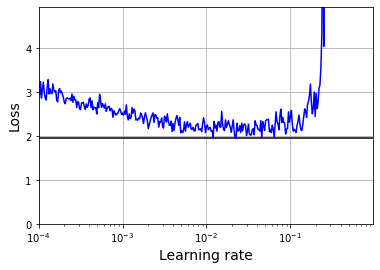

In [ ]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1,
                                   batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(tf.keras.layers.AlphaDropout(rate=0.1))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.SGD(learning_rate=2e-2)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [ ]:
n_epochs = 15
n_iterations = math.ceil(len(X_train_scaled) / batch_size) * n_epochs
onecycle = OneCycleScheduler(n_iterations, max_lr=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Epoch 1/15
352/352 [==============================] - 3s 9ms/step - loss: 2.0559 - accuracy: 0.2839 - val_loss: 1.7917 - val_accuracy: 0.3768
Epoch 2/15
352/352 [==============================] - 3s 8ms/step - loss: 1.7596 - accuracy: 0.3797 - val_loss: 1.6566 - val_accuracy: 0.4258
Epoch 3/15
352/352 [==============================] - 3s 8ms/step - loss: 1.6199 - accuracy: 0.4247 - val_loss: 1.6395 - val_accuracy: 0.4260
Epoch 4/15
352/352 [==============================] - 3s 9ms/step - loss: 1.5451 - accuracy: 0.4524 - val_loss: 1.6202 - val_accuracy: 0.4408
Epoch 5/15
352/352 [==============================] - 3s 8ms/step - loss: 1.4952 - accuracy: 0.4691 - val_loss: 1.5981 - val_accuracy: 0.4488
Epoch 6/15
352/352 [==============================] - 3s 9ms/step - loss: 1.4541 - accuracy: 0.4842 - val_loss: 1.5720 - val_accuracy: 0.4490
Epoch 7/15
352/352 [==============================] - 3s 9ms/step - loss: 1.4171 - accuracy: 0.4967 - val_loss: 1.6035 - val_accuracy: 0.4470
Epoch 

One cycle allowed us to train the model in just 15 epochs, each taking only 2 seconds (thanks to the larger batch size). This is several times faster than the fastest model we trained so far. Moreover, we improved the model's performance (from 50.7% to 52.0%).

##8. Practice training a deep neural network on the CIFAR10 image dataset:

>a. Build a DNN with 20 hidden layers of 100 neurons each (that’s
too many, but it’s the point of this exercise). Use He initialization
and the Swish activation function.

> b. Using Nadam optimization and early stopping, train the network
on the CIFAR10 dataset. You can load it with
tf.keras.datasets.cifar10.load_data(). The dataset is
composed of 60,000 32 × 32–pixel color images (50,000 for
training, 10,000 for testing) with 10 classes, so you’ll need a
softmax output layer with 10 neurons. Remember to search for
the right learning rate each time you change the model’s
architecture or hyperparameters.

> c. Now try adding batch normalization and compare the learning
curves: is it converging faster than before? Does it produce a
better model? How does it affect training speed?

> d. Try replacing batch normalization with SELU, and make the
necessary adjustments to ensure the network self-normalizes (i.e.,
standardize the input features, use LeCun normal initialization,
make sure the DNN contains only a sequence of dense layers,
etc.).

> e. Try regularizing the model with alpha dropout. Then, without
retraining your model, see if you can achieve better accuracy
using MC dropout.

> f. Retrain your model using 1cycle scheduling and see if it improves
training speed and model accuracy.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
# %%capture
!pip install wandb

import wandb
from wandb.keras import WandbCallback
!wandb login

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.1/266.1 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.5 MB/s eta 0:00:00
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
data = tf.keras.datasets.cifar10.load_data()
(X_train_full, y_train_full), (X_test, y_test) = data
X_train_full.shape

170498071/170498071 [==============================] - 5s 0us/step


(50000, 32, 32, 3)

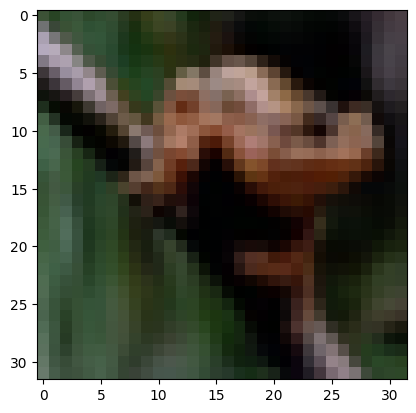

In [ ]:
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
plt.imshow(X_train[0])

In [ ]:
tf.random.set_seed(24)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = [32,32,3]))
for i in range(20):
    model.add(tf.keras.layers.Dense(100, activation = 'swish', kernel_initializer = 'he_normal'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [ ]:
class CIFAR10(tf.keras.Model):
    def __init__(self, num_layers=20, num_units=100, activation="swish", kernel_initializer="he_normal", **kwargs):
        super().__init__()
        self.flatten = tf.keras.layers.Flatten()
        self.dense_layers = [tf.keras.layers.Dense(num_units, activation=activation, kernel_initializer=kernel_initializer)
                             for _ in range(num_layers)]
        self.output_layer = tf.keras.layers.Dense(10, activation="softmax")

    def call(self, input):
        x = self.flatten(input)
        for dense_layer in self.dense_layers:
            x = dense_layer(x)
        return self.output_layer(x)

cifar = CIFAR10()

In [ ]:
optimizer = tf.keras.optimizers.Nadam(learning_rate = 5e-5, beta_1 = 0.9, beta_2 = 0.999)

In [ ]:
wandb.init(
    # set the wandb project where this run will be logged
    project="chapter11-take-2",
    name = "question-a-5e-5lr-sub",

    # track hyperparameters and run metadata
    config={
    "learning_rate": 5e-5,
    "architecture": "Basic DNN",
    "dataset": "CIFAR-10",
    "epochs": 20,
    "loss" : "sparse_categorical_crossentropy",

    }
)

config = wandb.config

In [ ]:
cifar.compile(loss = config.loss, optimizer = optimizer, metrics = ["accuracy"])

In [ ]:
wandb.init(
    # set the wandb project where this run will be logged
    project="chapter11-take-2",
    name = "question-a-5e-5lr-bookish",

    # track hyperparameters and run metadata
    config={
    "learning_rate": 5e-5,
    "architecture": "Basic DNN",
    "dataset": "CIFAR-10",
    "epochs": 20,
    "loss": "sparse_categorical_crossentropy"
    }
)

config = wandb.config

In [ ]:
model.compile(loss = config.loss, optimizer = optimizer, metrics = ["accuracy"])

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5)

In [ ]:
history = cifar.fit(X_train,y_train, epochs = 20, validation_data = (X_valid, y_valid), callbacks = [early_stop, WandbCallback()])

## With normalization


In [ ]:
class CIFAR10Normalized(tf.keras.Model):
    def __init__(self, activation = "swish", num_units=100, kernel_initializer = "he_normal", num_layer = 20, **kwargs):
        super().__init__(**kwargs)
        self.flatten = tf.keras.layers.Flatten(input_shape = [32,32]) # input_size, 1024
        self.norm = [tf.keras.layers.BatchNormalization() for i in range(num_layer)]
        self.dense = [tf.keras.layers.Dense(num_units, kernel_initializer = kernel_initializer) for i in range(num_layer)]# 100, 1024 and 100,100
        self.activation = [tf.keras.layers.Activation(activation) for i in range(num_layer)]
        self.op = tf.keras.layers.Dense(10, activation = "softmax") #100, 10

    def call(self, input):
        input = self.flatten(input)
        for i, j, k in zip(self.dense, self.norm, self.activation):
            input = j(input)
            input = i(input)
            input = k(input)
            # print(self.op(input))
        return self.op(input)

lass0 = CIFAR10Normalized()
lass0


In [ ]:
optimizer = tf.keras.optimizers.Nadam(learning_rate = 5e-4, beta_1 = 0.9, beta_2= 0.999)

In [ ]:
wandb.init(
    # set the wandb project where this run will be logged
    project="Chapter_11_CIFAR10_c",
    name = "question-c-5e-4lr",

    # track hyperparameters and run metadata
    config={
    "learning_rate": 5e-4,
    "architecture": "Basic DNN",
    "dataset": "CIFAR-10",
    "epochs": 20,
    }
)

config = wandb.config

In [ ]:
lass0.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer, metrics = ["accuracy"])

In [ ]:
history = lass0.fit(X_train, y_train, epochs = config.epochs, validation_data = (X_test, y_test), callbacks = [early_stop, WandbCallback()])

Epoch 1/20
1406/1407 [============================>.] - ETA: 0s - loss: 2.2365 - accuracy: 0.1792

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.
wandb: Adding directory to artifact (/content/wandb/run-20240327_105412-em6po592/files/model-best)... Done. 0.0s


1407/1407 [==============================] - 73s 38ms/step - loss: 2.2364 - accuracy: 0.1792 - val_loss: 548.0206 - val_accuracy: 0.1180
Epoch 2/20
1407/1407 [==============================] - ETA: 0s - loss: 1.9394 - accuracy: 0.2929

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.
wandb: Adding directory to artifact (/content/wandb/run-20240327_105412-em6po592/files/model-best)... Done. 0.0s


1407/1407 [==============================] - 54s 38ms/step - loss: 1.9394 - accuracy: 0.2929 - val_loss: 234.6631 - val_accuracy: 0.1474
Epoch 3/20
1407/1407 [==============================] - ETA: 0s - loss: 1.8218 - accuracy: 0.3432

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.
wandb: Adding directory to artifact (/content/wandb/run-20240327_105412-em6po592/files/model-best)... Done. 0.0s


1407/1407 [==============================] - 53s 38ms/step - loss: 1.8218 - accuracy: 0.3432 - val_loss: 120.0418 - val_accuracy: 0.1567
Epoch 4/20
1406/1407 [============================>.] - ETA: 0s - loss: 1.7416 - accuracy: 0.3791

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.
wandb: Adding directory to artifact (/content/wandb/run-20240327_105412-em6po592/files/model-best)... Done. 0.0s


1407/1407 [==============================] - 54s 38ms/step - loss: 1.7417 - accuracy: 0.3790 - val_loss: 65.6545 - val_accuracy: 0.1509
Epoch 5/20
1407/1407 [==============================] - 44s 31ms/step - loss: 1.6920 - accuracy: 0.3984 - val_loss: 398.8511 - val_accuracy: 0.1041
Epoch 6/20
1407/1407 [==============================] - 48s 34ms/step - loss: 1.6380 - accuracy: 0.4163 - val_loss: 168.4453 - val_accuracy: 0.1374
Epoch 7/20
1407/1407 [==============================] - 44s 31ms/step - loss: 1.5981 - accuracy: 0.4338 - val_loss: 181.4198 - val_accuracy: 0.1542
Epoch 8/20
1407/1407 [==============================] - 43s 31ms/step - loss: 1.5652 - accuracy: 0.4459 - val_loss: 267.4036 - val_accuracy: 0.1639
Epoch 9/20
1407/1407 [==============================] - 52s 37ms/step - loss: 1.5299 - accuracy: 0.4589 - val_loss: 186.8361 - val_accuracy: 0.1566


##SELU, leCun norm for self normalization

In [ ]:
class WithSeLU(tf.keras.Model):
    def __init__(self, activation = "selu",num_layers = 20, num_units = 100, kernel_initializer = "lecun_normal", **kwargs):
        super().__init__(**kwargs)
        self.flatten = tf.keras.layers.Flatten()
        self.dense = [tf.keras.layers.Dense(num_units, activation = activation, kernel_initializer = kernel_initializer) for i in range(num_layers)]
        # self.norm - [tf.keras.layers.Normalization()]
        self.op = tf.keras.layers.Dense(10, activation = "softmax")

    def call(self, input):
        input = self.flatten(input)
        for i in self.dense:
            input = i(input)
        return self.op(input)
with_selu = WithSeLU()

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
os.environ['No_IDEA'] = '1'
random.seed(hash("settng random seeds")%2**32-1)
np.random.seed(hash("Improves reproducability")%2**32-1)
tf.random.set_seed(hash("removes stochasticity")%2**32-1)

In [ ]:
wandb.init(
    # set the wandb project where this run will be logged
    project="Chapter_11_CIFAR10_d",
    name = "question-d-7e-4lr-nadam",

    # track hyperparameters and run metadata
    config={
    "learning_rate": 7e-4,
    "architecture": "Basic DNN",
    "dataset": "CIFAR-10",
    "epochs": 90,
    }
)

config = wandb.config

accuracy,▁▃▃▄▄▄▅▅▅▅▅▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇████
epoch,▁▁▁▂▂▂▂▂▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▇▇▇▇▇███
loss,█▇▆▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁
val_accuracy,▁▂▄▄▅▅▄▆▆▅▆▇▆▇▇▇▆▇▇▇▇▇▇████▇█▇████
val_loss,█▆▅▅▄▄▄▃▃▄▃▂▄▂▁▂▃▁▂▁▁▂▁▁▂▂▂▂▁▃▂▂▂▂
accuracy,0.62053
best_epoch,23
best_val_loss,1.42329
epoch,33
loss,1.06064
val_accuracy,0.501


In [ ]:
early = tf.keras.callbacks.EarlyStopping(patience = 10, monitor = "val_loss")
# optimizer = tf.keras.optimizers.SGD(learning_rate = config.learning_rate, momentum = 0.9, nesterov = True)
optimizer = tf.keras.optimizers.Nadam(learning_rate = config.learning_rate)
with_selu.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer, metrics = ["accuracy"])
history = with_selu.fit(X_train,y_train, epochs = config.epochs, validation_data = (X_valid, y_valid), callbacks = [WandbCallback(), early])

Epoch 1/90
1407/1407 [==============================] - ETA: 0s - loss: 2.0176 - accuracy: 0.2534

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.
wandb: Adding directory to artifact (/content/wandb/run-20240327_112954-a2efv0wi/files/model-best)... Done. 0.0s


1407/1407 [==============================] - 28s 14ms/step - loss: 2.0176 - accuracy: 0.2534 - val_loss: 1.9142 - val_accuracy: 0.2942
Epoch 2/90
1405/1407 [============================>.] - ETA: 0s - loss: 1.8511 - accuracy: 0.3269

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.
wandb: Adding directory to artifact (/content/wandb/run-20240327_112954-a2efv0wi/files/model-best)... Done. 0.0s


1407/1407 [==============================] - 20s 14ms/step - loss: 1.8508 - accuracy: 0.3270 - val_loss: 1.8541 - val_accuracy: 0.3378
Epoch 3/90
1403/1407 [============================>.] - ETA: 0s - loss: 1.7926 - accuracy: 0.3534

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.
wandb: Adding directory to artifact (/content/wandb/run-20240327_112954-a2efv0wi/files/model-best)... Done. 0.0s


1407/1407 [==============================] - 20s 14ms/step - loss: 1.7923 - accuracy: 0.3535 - val_loss: 1.7228 - val_accuracy: 0.3820
Epoch 4/90
1407/1407 [==============================] - 17s 12ms/step - loss: 1.7291 - accuracy: 0.3766 - val_loss: 1.7263 - val_accuracy: 0.3752
Epoch 5/90
1407/1407 [==============================] - 17s 12ms/step - loss: 1.6882 - accuracy: 0.3915 - val_loss: 1.8423 - val_accuracy: 0.3446
Epoch 6/90
1403/1407 [============================>.] - ETA: 0s - loss: 1.6585 - accuracy: 0.4077

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.
wandb: Adding directory to artifact (/content/wandb/run-20240327_112954-a2efv0wi/files/model-best)... Done. 0.0s


1407/1407 [==============================] - 20s 14ms/step - loss: 1.6584 - accuracy: 0.4078 - val_loss: 1.6922 - val_accuracy: 0.4004
Epoch 7/90
1403/1407 [============================>.] - ETA: 0s - loss: 1.6216 - accuracy: 0.4198

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.
wandb: Adding directory to artifact (/content/wandb/run-20240327_112954-a2efv0wi/files/model-best)... Done. 0.0s


1407/1407 [==============================] - 20s 14ms/step - loss: 1.6214 - accuracy: 0.4199 - val_loss: 1.6896 - val_accuracy: 0.3986
Epoch 8/90
1404/1407 [============================>.] - ETA: 0s - loss: 1.6030 - accuracy: 0.4300

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.
wandb: Adding directory to artifact (/content/wandb/run-20240327_112954-a2efv0wi/files/model-best)... Done. 0.0s


1407/1407 [==============================] - 20s 14ms/step - loss: 1.6030 - accuracy: 0.4300 - val_loss: 1.6521 - val_accuracy: 0.4092
Epoch 9/90
1407/1407 [==============================] - 17s 12ms/step - loss: 1.5737 - accuracy: 0.4380 - val_loss: 1.6807 - val_accuracy: 0.3938
Epoch 10/90
1407/1407 [==============================] - 16s 12ms/step - loss: 1.5499 - accuracy: 0.4480 - val_loss: 1.7232 - val_accuracy: 0.4120
Epoch 11/90
1407/1407 [==============================] - 17s 12ms/step - loss: 1.5346 - accuracy: 0.4538 - val_loss: 1.8737 - val_accuracy: 0.3984
Epoch 12/90
1407/1407 [==============================] - 17s 12ms/step - loss: 1.5060 - accuracy: 0.4640 - val_loss: 1.6831 - val_accuracy: 0.4456
Epoch 13/90
1407/1407 [==============================] - 16s 12ms/step - loss: 1.7674 - accuracy: 0.3764 - val_loss: 1.6877 - val_accuracy: 0.3940
Epoch 14/90
1407/1407 [==============================] - ETA: 0s - loss: 1.5731 - accuracy: 0.4381

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.
wandb: Adding directory to artifact (/content/wandb/run-20240327_112954-a2efv0wi/files/model-best)... Done. 0.0s


1407/1407 [==============================] - 19s 14ms/step - loss: 1.5731 - accuracy: 0.4381 - val_loss: 1.5554 - val_accuracy: 0.4400
Epoch 15/90
1407/1407 [==============================] - 16s 12ms/step - loss: 1.7623 - accuracy: 0.3521 - val_loss: 1.7884 - val_accuracy: 0.3564
Epoch 16/90
1407/1407 [==============================] - 16s 12ms/step - loss: 1.6327 - accuracy: 0.4113 - val_loss: 1.6380 - val_accuracy: 0.4146
Epoch 17/90
1407/1407 [==============================] - 16s 12ms/step - loss: 1.5717 - accuracy: 0.4374 - val_loss: 1.6877 - val_accuracy: 0.4046
Epoch 18/90
1407/1407 [==============================] - 17s 12ms/step - loss: 1.5347 - accuracy: 0.4518 - val_loss: 1.5866 - val_accuracy: 0.4348
Epoch 19/90
1407/1407 [==============================] - 18s 13ms/step - loss: 1.5121 - accuracy: 0.4588 - val_loss: 1.5789 - val_accuracy: 0.4216
Epoch 20/90
1407/1407 [==============================] - 16s 11ms/step - loss: 1.4898 - accuracy: 0.4686 - val_loss: 1.5589 - val_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.
wandb: Adding directory to artifact (/content/wandb/run-20240327_112954-a2efv0wi/files/model-best)... Done. 0.0s


1407/1407 [==============================] - 20s 14ms/step - loss: 1.4540 - accuracy: 0.4827 - val_loss: 1.5425 - val_accuracy: 0.4540
Epoch 23/90
1403/1407 [============================>.] - ETA: 0s - loss: 1.4408 - accuracy: 0.4871

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.
wandb: Adding directory to artifact (/content/wandb/run-20240327_112954-a2efv0wi/files/model-best)... Done. 0.0s


1407/1407 [==============================] - 20s 14ms/step - loss: 1.4405 - accuracy: 0.4872 - val_loss: 1.4947 - val_accuracy: 0.4632
Epoch 24/90
1407/1407 [==============================] - 17s 12ms/step - loss: 1.4207 - accuracy: 0.4964 - val_loss: 1.5205 - val_accuracy: 0.4640
Epoch 25/90
1407/1407 [==============================] - 16s 12ms/step - loss: 1.3997 - accuracy: 0.5038 - val_loss: 1.5515 - val_accuracy: 0.4504
Epoch 26/90
1405/1407 [============================>.] - ETA: 0s - loss: 1.4316 - accuracy: 0.4922

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.
wandb: Adding directory to artifact (/content/wandb/run-20240327_112954-a2efv0wi/files/model-best)... Done. 0.0s


1407/1407 [==============================] - 23s 16ms/step - loss: 1.4316 - accuracy: 0.4922 - val_loss: 1.4756 - val_accuracy: 0.4856
Epoch 27/90
1407/1407 [==============================] - 16s 12ms/step - loss: 1.3783 - accuracy: 0.5112 - val_loss: 1.5023 - val_accuracy: 0.4676
Epoch 28/90
1407/1407 [==============================] - 16s 11ms/step - loss: 1.3585 - accuracy: 0.5188 - val_loss: 1.5026 - val_accuracy: 0.4688
Epoch 29/90
1407/1407 [==============================] - 16s 11ms/step - loss: 1.3480 - accuracy: 0.5208 - val_loss: 1.5183 - val_accuracy: 0.4720
Epoch 30/90
1407/1407 [==============================] - 16s 12ms/step - loss: 1.3348 - accuracy: 0.5272 - val_loss: 1.5487 - val_accuracy: 0.4528
Epoch 31/90
1407/1407 [==============================] - 17s 12ms/step - loss: 1.3208 - accuracy: 0.5303 - val_loss: 1.5229 - val_accuracy: 0.4688
Epoch 32/90
1407/1407 [==============================] - 16s 11ms/step - loss: 2.4072 - accuracy: 0.4093 - val_loss: 1.7952 - val_

## Alpha Dropout and then MC dropout without retrain

###AlphaDropout

In [ ]:
wandb.init(
    project = "Chapter_11_CIFAR_10_e",
    name = "question_e_alpha_dropout_lr5e-4",

    config = {
        "dataset": "CIFAR_10",
        "lr": 5e-4,
        "archetecture": "Basic DNN",
        "loss": "sparse_categorical_crossentropy",
        "epochs": 20,
        "num_layer":20,
        "num_units": 100,
        "activation": "selu",
        "kernel_init": "lecun_normal"
    }
)

wandb: Currently logged in as: 1999sandeepdey (thecommon). Use `wandb login --relogin` to force relogin


In [ ]:
config  = wandb.config

In [ ]:
class AlphaSeLU(tf.keras.Model):
    def __init__(self, num_layers = config.num_layer, num_units = config.num_units, activation = config.activation, kernel_initializer = config.kernel_init, **kwargs):
        super().__init__(**kwargs)
        self.flatten = tf.keras.layers.Flatten(input_shape = [32, 32, 3])
        self.dense = [tf.keras.layers.Dense(num_units, kernel_initializer = kernel_initializer, activation = activation) for i in range(num_layers)]
        self.dropout = tf.keras.layers.AlphaDropout(rate = 0.1)
        self.op = tf.keras.layers.Dense(10, activation = "softmax")

    def call(self, input):
        input = self.flatten(input)
        for dense in self.dense:
            input = dense(input)

        input = self.dropout(input)
        return self.op(input)

model = AlphaSeLU(name = "Alpha_model")

optimizer = tf.keras.optimizers.Nadam(learning_rate = config.lr, beta_1 = 0.9, beta_2 = 0.999)

early_stop = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights = True, monitor = "val_loss")
model_check = tf.keras.callbacks.ModelCheckpoint("aplha_model", save_best_only = True)

model.compile(loss = config.loss, optimizer = optimizer, metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs = config.epochs, validation_data = (X_valid, y_valid), callbacks = [early_stop, model_check, WandbCallback()])


Epoch 1/20
1407/1407 [==============================] - 33s 17ms/step - loss: 2.0061 - accuracy: 0.2685 - val_loss: 1.8834 - val_accuracy: 0.3216
Epoch 2/20
1407/1407 [==============================] - 23s 16ms/step - loss: 1.8437 - accuracy: 0.3345 - val_loss: 1.9484 - val_accuracy: 0.3144
Epoch 3/20
1407/1407 [==============================] - 22s 16ms/step - loss: 1.7809 - accuracy: 0.3555 - val_loss: 1.9312 - val_accuracy: 0.3292
Epoch 4/20
1407/1407 [==============================] - 27s 19ms/step - loss: 1.7293 - accuracy: 0.3779 - val_loss: 1.7517 - val_accuracy: 0.3812
Epoch 5/20
1407/1407 [==============================] - 24s 17ms/step - loss: 1.6814 - accuracy: 0.3971 - val_loss: 1.6913 - val_accuracy: 0.4140
Epoch 6/20
1407/1407 [==============================] - 21s 15ms/step - loss: 1.6450 - accuracy: 0.4136 - val_loss: 1.6701 - val_accuracy: 0.4056
Epoch 7/20
1407/1407 [==============================] - 19s 14ms/step - loss: 1.6143 - accuracy: 0.4264 - val_loss: 1.6123 -

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 101.0467 - accuracy: 0.2959


[101.04667663574219, 0.29589998722076416]

In [ ]:
class AlphaSeLU(tf.keras.Model):
    def __init__(self, num_layers = 20, num_units = 100, activation = 'selu', kernel_initializer = "lecun_normal", rate = 0.1, **kwargs):
        super().__init__(**kwargs)
        self.flatten = tf.keras.layers.Flatten()
        self.dense = [tf.keras.layers.Dense(num_units, activation = activation,kernel_initializer = kernel_initializer) for i in range(num_layers)]
        self.dropout = tf.keras.layers.AlphaDropout(rate = rate)
        self.op = tf.keras.layers.Dense(10, activation = "softmax")

    def call(self, input):
        input = self.flatten(input)
        for dense in self.dense:
            # input = dropout(input)
            input = dense(input)
        input = self.dropout(input)
        return self.op(input)

alpha = AlphaSeLU()

In [ ]:
wandb.init(
    # set the wandb project where this run will be logged
    project="Chapter_11_CIFAR10_e",
    name = "e_1e-3lr_nestrov"

    # track hyperparameters and run metadata
    config={
    "learning_rate": 1e-3,
    "architecture": "Basic DNN",
    "dataset": "CIFAR-10",
    "epochs": 90,
    "loss": "sparse_categorical_crossentropy"
    }
)

config = wandb.config

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate = config.learning_rate, momentum = 0.9, nesterov = True)

alpha.compile(loss = config.loss, optimizer = optimizer, metrics = ["accuracy"])

history = alpha.fit(X_train, y_train, epochs = config.epochs, validation_data = (X_valid, y_valid), callbacks = [WandbCallback()])

Epoch 1/90
1402/1407 [============================>.] - ETA: 0s - loss: 1.9384 - accuracy: 0.2913

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.
wandb: Adding directory to artifact (/content/wandb/run-20240327_121434-i3zylg43/files/model-best)... Done. 0.0s


1407/1407 [==============================] - 17s 10ms/step - loss: 1.9382 - accuracy: 0.2913 - val_loss: 1.7850 - val_accuracy: 0.3548
Epoch 2/90
1407/1407 [==============================] - 15s 11ms/step - loss: 1.7591 - accuracy: 0.3608 - val_loss: 1.9032 - val_accuracy: 0.3406
Epoch 3/90
1403/1407 [============================>.] - ETA: 0s - loss: 1.6825 - accuracy: 0.3898

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.
wandb: Adding directory to artifact (/content/wandb/run-20240327_121434-i3zylg43/files/model-best)... Done. 0.1s


1407/1407 [==============================] - 19s 14ms/step - loss: 1.6821 - accuracy: 0.3898 - val_loss: 1.6845 - val_accuracy: 0.4014
Epoch 4/90
1403/1407 [============================>.] - ETA: 0s - loss: 1.6255 - accuracy: 0.4138

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.
wandb: Adding directory to artifact (/content/wandb/run-20240327_121434-i3zylg43/files/model-best)... Done. 0.0s


1407/1407 [==============================] - 15s 10ms/step - loss: 1.6251 - accuracy: 0.4140 - val_loss: 1.6647 - val_accuracy: 0.4100
Epoch 5/90
1407/1407 [==============================] - 11s 8ms/step - loss: 1.5847 - accuracy: 0.4306 - val_loss: 1.6716 - val_accuracy: 0.4052
Epoch 6/90
1407/1407 [==============================] - ETA: 0s - loss: 1.5482 - accuracy: 0.4458

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.
wandb: Adding directory to artifact (/content/wandb/run-20240327_121434-i3zylg43/files/model-best)... Done. 0.0s


1407/1407 [==============================] - 14s 10ms/step - loss: 1.5482 - accuracy: 0.4458 - val_loss: 1.6119 - val_accuracy: 0.4160
Epoch 7/90
1407/1407 [==============================] - 14s 10ms/step - loss: 1.5188 - accuracy: 0.4530 - val_loss: 1.6699 - val_accuracy: 0.4144
Epoch 8/90
1404/1407 [============================>.] - ETA: 0s - loss: 1.4923 - accuracy: 0.4621

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.
wandb: Adding directory to artifact (/content/wandb/run-20240327_121434-i3zylg43/files/model-best)... Done. 0.0s


1407/1407 [==============================] - 15s 11ms/step - loss: 1.4923 - accuracy: 0.4621 - val_loss: 1.5515 - val_accuracy: 0.4624
Epoch 9/90
1407/1407 [==============================] - 11s 8ms/step - loss: 1.4664 - accuracy: 0.4708 - val_loss: 1.5616 - val_accuracy: 0.4508
Epoch 10/90
1407/1407 [==============================] - 12s 8ms/step - loss: 1.4447 - accuracy: 0.4792 - val_loss: 1.6602 - val_accuracy: 0.4422
Epoch 11/90
1400/1407 [============================>.] - ETA: 0s - loss: 1.4215 - accuracy: 0.4870

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.
wandb: Adding directory to artifact (/content/wandb/run-20240327_121434-i3zylg43/files/model-best)... Done. 0.0s


1407/1407 [==============================] - 14s 10ms/step - loss: 1.4210 - accuracy: 0.4872 - val_loss: 1.5068 - val_accuracy: 0.4574
Epoch 12/90
1405/1407 [============================>.] - ETA: 0s - loss: 1.3988 - accuracy: 0.4946

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.
wandb: Adding directory to artifact (/content/wandb/run-20240327_121434-i3zylg43/files/model-best)... Done. 0.0s


1407/1407 [==============================] - 16s 11ms/step - loss: 1.3991 - accuracy: 0.4945 - val_loss: 1.4784 - val_accuracy: 0.4828
Epoch 13/90
1407/1407 [==============================] - 13s 9ms/step - loss: 1.3826 - accuracy: 0.5006 - val_loss: 1.5828 - val_accuracy: 0.4490
Epoch 14/90
1407/1407 [==============================] - 11s 8ms/step - loss: 1.3606 - accuracy: 0.5094 - val_loss: 1.4846 - val_accuracy: 0.4736
Epoch 15/90
1407/1407 [==============================] - 11s 8ms/step - loss: 1.3455 - accuracy: 0.5149 - val_loss: 1.4967 - val_accuracy: 0.4868
Epoch 16/90
1400/1407 [============================>.] - ETA: 0s - loss: 1.3274 - accuracy: 0.5209

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.
wandb: Adding directory to artifact (/content/wandb/run-20240327_121434-i3zylg43/files/model-best)... Done. 0.0s


1407/1407 [==============================] - 14s 10ms/step - loss: 1.3275 - accuracy: 0.5209 - val_loss: 1.4734 - val_accuracy: 0.4852
Epoch 17/90
1407/1407 [==============================] - 12s 8ms/step - loss: 1.3087 - accuracy: 0.5261 - val_loss: 1.5464 - val_accuracy: 0.4768
Epoch 18/90
1407/1407 [==============================] - 12s 8ms/step - loss: 1.2950 - accuracy: 0.5328 - val_loss: 1.5073 - val_accuracy: 0.4790
Epoch 19/90
1404/1407 [============================>.] - ETA: 0s - loss: 1.2806 - accuracy: 0.5382

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.
wandb: Adding directory to artifact (/content/wandb/run-20240327_121434-i3zylg43/files/model-best)... Done. 0.0s


1407/1407 [==============================] - 14s 10ms/step - loss: 1.2807 - accuracy: 0.5382 - val_loss: 1.4486 - val_accuracy: 0.4918
Epoch 20/90
1405/1407 [============================>.] - ETA: 0s - loss: 1.2639 - accuracy: 0.5430

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.
wandb: Adding directory to artifact (/content/wandb/run-20240327_121434-i3zylg43/files/model-best)... Done. 0.0s


1407/1407 [==============================] - 15s 10ms/step - loss: 1.2642 - accuracy: 0.5429 - val_loss: 1.4411 - val_accuracy: 0.4918
Epoch 21/90
1407/1407 [==============================] - 12s 8ms/step - loss: 1.2495 - accuracy: 0.5486 - val_loss: 1.4539 - val_accuracy: 0.5050
Epoch 22/90
1407/1407 [==============================] - 11s 8ms/step - loss: 1.2337 - accuracy: 0.5566 - val_loss: 1.4682 - val_accuracy: 0.4954
Epoch 23/90
1407/1407 [==============================] - 12s 8ms/step - loss: 1.2201 - accuracy: 0.5603 - val_loss: 1.4854 - val_accuracy: 0.4962
Epoch 24/90
1400/1407 [============================>.] - ETA: 0s - loss: 1.2052 - accuracy: 0.5660

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.
wandb: Adding directory to artifact (/content/wandb/run-20240327_121434-i3zylg43/files/model-best)... Done. 0.0s


1407/1407 [==============================] - 16s 11ms/step - loss: 1.2048 - accuracy: 0.5662 - val_loss: 1.4410 - val_accuracy: 0.5170
Epoch 25/90
1407/1407 [==============================] - 12s 8ms/step - loss: 1.1861 - accuracy: 0.5722 - val_loss: 1.4553 - val_accuracy: 0.5194
Epoch 26/90
1407/1407 [==============================] - 11s 8ms/step - loss: 1.1732 - accuracy: 0.5779 - val_loss: 1.5093 - val_accuracy: 0.5010
Epoch 27/90
1407/1407 [==============================] - 11s 8ms/step - loss: 1.1635 - accuracy: 0.5804 - val_loss: 1.5136 - val_accuracy: 0.5106
Epoch 28/90
1407/1407 [==============================] - 11s 8ms/step - loss: 1.1512 - accuracy: 0.5867 - val_loss: 1.5328 - val_accuracy: 0.5058
Epoch 29/90
1407/1407 [==============================] - 11s 8ms/step - loss: 1.1363 - accuracy: 0.5892 - val_loss: 1.5197 - val_accuracy: 0.5174
Epoch 30/90
1407/1407 [==============================] - 12s 8ms/step - loss: 1.1229 - accuracy: 0.5953 - val_loss: 1.6237 - val_accura

###MCDropout

In [ ]:
wandb.init(
    project = "Chapter_11_question_e_MC",
    name = "Question_e_mc_like_prev",

    config = {
        "epochs": 20,
        "archetechture": "Simple_DDN_MC",
        "data_set": "cifar_10",
        "loss": "sparse_categorical_crossentropy"
    }
)

In [ ]:
class MCDrop(tf.keras.layers.AlphaDropout):
    def __init__(self, rate, **kwargs):
        super().__init__(rate, **kwargs)

    def call(self, inputs, training = False):
        return super().call(inputs, training = True)

early = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 5)


mc_model = tf.keras.Sequential([
    (
        MCDrop(0.1)
        if isinstance(layer, tf.keras.layers.AlphaDropout)
        else layer
    )
    for layer in model.layers
])

def mc_dropout_predict_probas(model, X, n_samples = 10):
    Y_probas = [model.predict(X) for sample in range(n_samples)]
    return np.mean(Y_probas, axis = 0)

def mc_dropout_predict_classes(model, X, n_samples = 10):
    Y_probas = mc_dropout_predict_probas(model, X, n_samples)
    return Y_probas.argmax(axis = 1)

mc_model.compile(loss = config.loss, optimizer = optimizer, metrics = ["accuracy"])

tf.random.set_seed(37)

history = mc_model.fit(X_train, y_train, epochs = config.epochs, validation_data = (X_valid, y_valid), callbacks = [WandbCallback(), early_stop])

y_pred = mc_dropout_predict_classes(mc_model, X_valid)
accuracy = (y_pred == y_valid[:, 0]).mean()



Epoch 1/20
1404/1407 [============================>.] - ETA: 0s - loss: 1.9147 - accuracy: 0.2952

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240409_120429-cchc08wb/files/model-best)... Done. 0.0s


1407/1407 [==============================] - 23s 14ms/step - loss: 1.9144 - accuracy: 0.2953 - val_loss: 1.8563 - val_accuracy: 0.3222
Epoch 2/20
1406/1407 [============================>.] - ETA: 0s - loss: 1.8280 - accuracy: 0.3400

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240409_120429-cchc08wb/files/model-best)... Done. 0.0s


1407/1407 [==============================] - 20s 14ms/step - loss: 1.8279 - accuracy: 0.3400 - val_loss: 1.8414 - val_accuracy: 0.3202
Epoch 3/20
1405/1407 [============================>.] - ETA: 0s - loss: 1.7724 - accuracy: 0.3622

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240409_120429-cchc08wb/files/model-best)... Done. 0.0s


1407/1407 [==============================] - 20s 14ms/step - loss: 1.7725 - accuracy: 0.3622 - val_loss: 1.7441 - val_accuracy: 0.3732
Epoch 4/20
1407/1407 [==============================] - ETA: 0s - loss: 1.7230 - accuracy: 0.3814

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240409_120429-cchc08wb/files/model-best)... Done. 0.0s


1407/1407 [==============================] - 20s 14ms/step - loss: 1.7230 - accuracy: 0.3814 - val_loss: 1.7353 - val_accuracy: 0.3692
Epoch 5/20
1406/1407 [============================>.] - ETA: 0s - loss: 1.6777 - accuracy: 0.3995

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240409_120429-cchc08wb/files/model-best)... Done. 0.0s


1407/1407 [==============================] - 20s 14ms/step - loss: 1.6778 - accuracy: 0.3994 - val_loss: 1.6860 - val_accuracy: 0.3910
Epoch 6/20
1404/1407 [============================>.] - ETA: 0s - loss: 1.6431 - accuracy: 0.4160

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240409_120429-cchc08wb/files/model-best)... Done. 0.0s


1407/1407 [==============================] - 19s 14ms/step - loss: 1.6431 - accuracy: 0.4161 - val_loss: 1.6324 - val_accuracy: 0.4256
Epoch 7/20
1407/1407 [==============================] - ETA: 0s - loss: 1.6080 - accuracy: 0.4266

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240409_120429-cchc08wb/files/model-best)... Done. 0.0s


1407/1407 [==============================] - 22s 16ms/step - loss: 1.6080 - accuracy: 0.4266 - val_loss: 1.6184 - val_accuracy: 0.4224
Epoch 8/20
1403/1407 [============================>.] - ETA: 0s - loss: 1.5737 - accuracy: 0.4412

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240409_120429-cchc08wb/files/model-best)... Done. 0.0s


1407/1407 [==============================] - 20s 14ms/step - loss: 1.5737 - accuracy: 0.4412 - val_loss: 1.5718 - val_accuracy: 0.4422
Epoch 9/20
1407/1407 [==============================] - 17s 12ms/step - loss: 1.5473 - accuracy: 0.4478 - val_loss: 1.6131 - val_accuracy: 0.4268
Epoch 10/20
1406/1407 [============================>.] - ETA: 0s - loss: 1.5270 - accuracy: 0.4569

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240409_120429-cchc08wb/files/model-best)... Done. 0.0s


1407/1407 [==============================] - 21s 15ms/step - loss: 1.5271 - accuracy: 0.4568 - val_loss: 1.5667 - val_accuracy: 0.4380
Epoch 11/20
1407/1407 [==============================] - 17s 12ms/step - loss: 1.5033 - accuracy: 0.4656 - val_loss: 1.5724 - val_accuracy: 0.4396
Epoch 12/20
1407/1407 [==============================] - 17s 12ms/step - loss: 1.4812 - accuracy: 0.4746 - val_loss: 1.5733 - val_accuracy: 0.4378
Epoch 13/20
1407/1407 [==============================] - 16s 12ms/step - loss: 1.4645 - accuracy: 0.4796 - val_loss: 1.6723 - val_accuracy: 0.4328
Epoch 14/20
1407/1407 [==============================] - ETA: 0s - loss: 1.4458 - accuracy: 0.4900

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240409_120429-cchc08wb/files/model-best)... Done. 0.0s


1407/1407 [==============================] - 20s 14ms/step - loss: 1.4458 - accuracy: 0.4900 - val_loss: 1.5423 - val_accuracy: 0.4644
Epoch 15/20
1406/1407 [============================>.] - ETA: 0s - loss: 1.4293 - accuracy: 0.4937

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240409_120429-cchc08wb/files/model-best)... Done. 0.0s


1407/1407 [==============================] - 22s 16ms/step - loss: 1.4293 - accuracy: 0.4937 - val_loss: 1.4971 - val_accuracy: 0.4614
Epoch 16/20
1407/1407 [==============================] - 17s 12ms/step - loss: 1.4102 - accuracy: 0.5020 - val_loss: 1.5279 - val_accuracy: 0.4706
Epoch 17/20
1407/1407 [==============================] - ETA: 0s - loss: 1.3983 - accuracy: 0.5057

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240409_120429-cchc08wb/files/model-best)... Done. 0.0s


1407/1407 [==============================] - 23s 17ms/step - loss: 1.3983 - accuracy: 0.5057 - val_loss: 1.4776 - val_accuracy: 0.4828
Epoch 18/20
1407/1407 [==============================] - 17s 12ms/step - loss: 1.3782 - accuracy: 0.5100 - val_loss: 1.5110 - val_accuracy: 0.4676
Epoch 19/20
1407/1407 [==============================] - 23s 16ms/step - loss: 1.3660 - accuracy: 0.5151 - val_loss: 1.5225 - val_accuracy: 0.4810
Epoch 20/20
157/157 [==============================] - 0s 3ms/step


In [ ]:
accuracy

0.4564

##1cycle rescheduling

In [ ]:
wandb.init(
    project = "Chapter_11_q_f_onecycle",
    name = "question_f_learing_rate_4e-5",

    config = {
        "archetecture": "MLP_simple_DNN",
        "dataset" : "cifar10",
        "loss":"sparse_categorical_crossentropy",
        "epochs": 20,
        "learning_rate": 1e-3
    }
)

In [ ]:
config = wandb.config

In [ ]:
class OneCycle(tf.keras.Model):
    def __init__(self, rate = 0.1, num_layers = 20, num_units = 100, activation = "selu", kernel_initializer = "lecun_normal", **kwargs):
        super().__init__(**kwargs)
        self.flatten = tf.keras.layers.Flatten()
        self.dense = [tf.keras.layers.Dense(num_units, activation = activation, kernel_initializer = kernel_initializer) for i in range(num_layers)]
        self.dropout = tf.keras.layers.AlphaDropout(rate = rate)
        self.op = tf.keras.layers.Dense(10, activation = "softmax")

    def call(self, input):
        input = self.flatten(input)
        for dense in self.dense:
            input = dense(input)
        input = self.dropout(input)
        return self.op(input)

model = OneCycle()

In [ ]:
optimizer = tf.keras.optimizers.Nadam(learning_rate = config.learning_rate, beta_1 = 0.9, beta_2 = 0.999)

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(patience = 5, monitor = "val_loss")
model_checkp = tf.keras.callbacks.ModelCheckpoint("onecycle", save_best_only = True)

In [ ]:
model.compile(loss = config.loss, optimizer = optimizer, metrics = ["accuracy"])

In [ ]:
class OneCycleScheduler(tf.keras.callbacks.Callback):
    def __init__(self, iterations, max_lr=1e-3, start_lr=None,
                 last_iterations=None, last_lr=None):
        self.iterations = iterations
        self.max_lr = max_lr
        self.start_lr = start_lr or max_lr / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_lr = last_lr or self.start_lr / 1000
        self.iteration = 0

    def _interpolate(self, iter1, iter2, lr1, lr2):
        return (lr2 - lr1) * (self.iteration - iter1) / (iter2 - iter1) + lr1

    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            lr = self._interpolate(0, self.half_iteration, self.start_lr,
                                   self.max_lr)
        elif self.iteration < 2 * self.half_iteration:
            lr = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                   self.max_lr, self.start_lr)
        else:
            lr = self._interpolate(2 * self.half_iteration, self.iterations,
                                   self.start_lr, self.last_lr)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, lr)

In [ ]:
import math
batch_size = 28
onecycle = OneCycleScheduler(math.ceil(len(X_train)/batch_size) * config.epochs, max_lr = 1e-3)

In [ ]:
history = model.fit(X_train, y_train, epochs = config.epochs, validation_data = (X_valid, y_valid), callbacks = [WandbCallback(), early_stop, model_checkp, ])

Epoch 1/20
1407/1407 [==============================] - ETA: 0s - loss: 2.1345 - accuracy: 0.1785

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.
wandb: Adding directory to artifact (/content/wandb/run-20240409_145540-h88mqzdg/files/model-best)... Done. 0.0s


1407/1407 [==============================] - 36s 17ms/step - loss: 2.1345 - accuracy: 0.1785 - val_loss: 2.1651 - val_accuracy: 0.2088
Epoch 2/20
1405/1407 [============================>.] - ETA: 0s - loss: 1.9877 - accuracy: 0.2333

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.
wandb: Adding directory to artifact (/content/wandb/run-20240409_145540-h88mqzdg/files/model-best)... Done. 0.0s


1407/1407 [==============================] - 23s 17ms/step - loss: 1.9875 - accuracy: 0.2334 - val_loss: 1.9471 - val_accuracy: 0.2498
Epoch 3/20
1407/1407 [==============================] - 16s 11ms/step - loss: 1.9543 - accuracy: 0.2518 - val_loss: 1.9586 - val_accuracy: 0.2548
Epoch 4/20
1406/1407 [============================>.] - ETA: 0s - loss: 1.9176 - accuracy: 0.2653

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.
wandb: Adding directory to artifact (/content/wandb/run-20240409_145540-h88mqzdg/files/model-best)... Done. 0.0s


1407/1407 [==============================] - 22s 16ms/step - loss: 1.9177 - accuracy: 0.2653 - val_loss: 1.8990 - val_accuracy: 0.2854
Epoch 5/20
1403/1407 [============================>.] - ETA: 0s - loss: 1.9180 - accuracy: 0.2717

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.
wandb: Adding directory to artifact (/content/wandb/run-20240409_145540-h88mqzdg/files/model-best)... Done. 0.0s


1407/1407 [==============================] - 22s 16ms/step - loss: 1.9184 - accuracy: 0.2716 - val_loss: 1.8757 - val_accuracy: 0.2868
Epoch 6/20
1407/1407 [==============================] - 16s 12ms/step - loss: 1.9477 - accuracy: 0.2557 - val_loss: 1.9652 - val_accuracy: 0.2546
Epoch 7/20
1407/1407 [==============================] - 16s 12ms/step - loss: 1.8997 - accuracy: 0.2692 - val_loss: 1.9161 - val_accuracy: 0.2750
Epoch 8/20
1407/1407 [==============================] - 16s 12ms/step - loss: 2.1227 - accuracy: 0.2185 - val_loss: 2.0413 - val_accuracy: 0.2070
Epoch 9/20
1407/1407 [==============================] - 16s 12ms/step - loss: 1.9840 - accuracy: 0.2121 - val_loss: 2.1271 - val_accuracy: 0.2122
Epoch 10/20
1407/1407 [==============================] - 17s 12ms/step - loss: 2.1837 - accuracy: 0.1796 - val_loss: 2.1198 - val_accuracy: 0.1682
